# COVID-19 Data Analysis Project

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

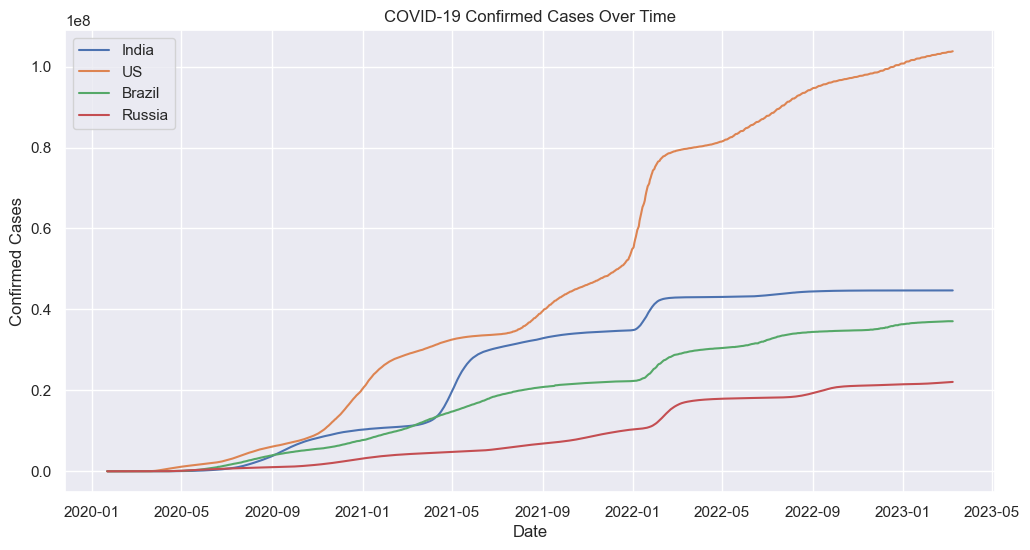

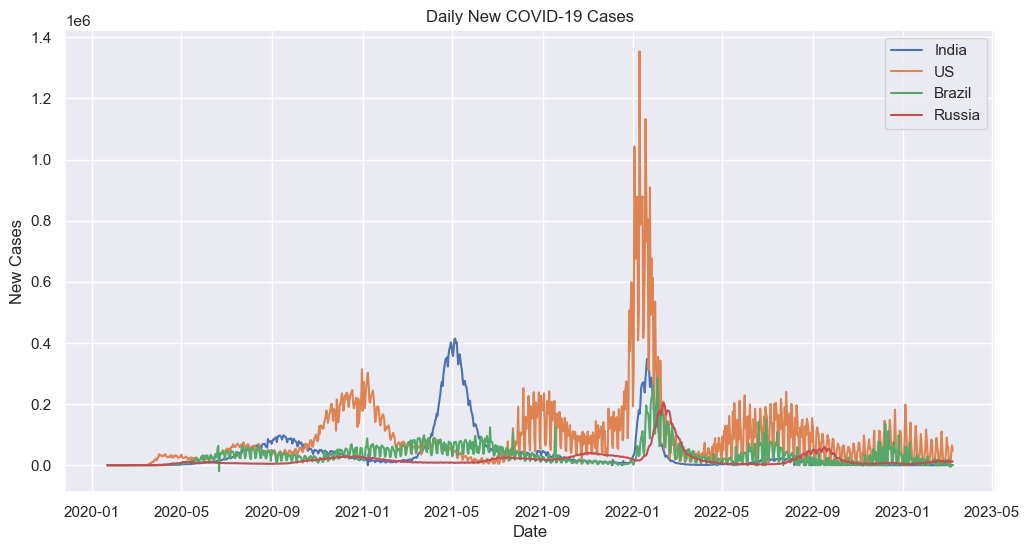

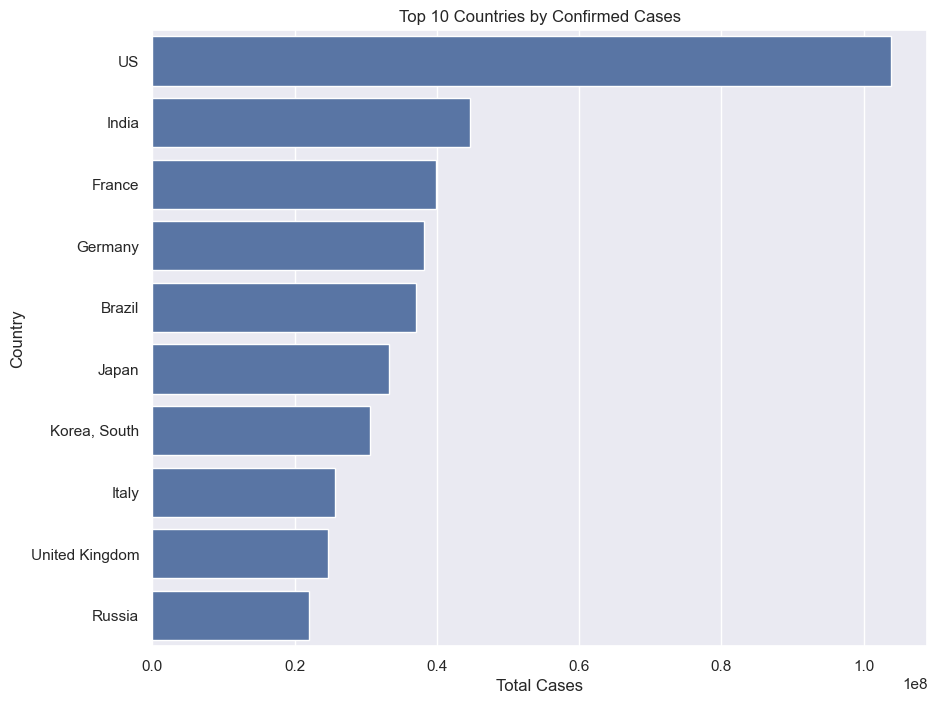

In [114]:
# COVID-19 Data Analysis Project

## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset (example: time_series_covid19_confirmed_global.csv)
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")

## 3. Data Overview
print(confirmed_df.head())
print(confirmed_df.info())

## 4. Preprocessing
# Drop non-date columns and group by country
df = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df = df.groupby('Country/Region').sum()

# Transpose for time-series analysis
df = df.T

# Convert index to datetime format
df.index = pd.to_datetime(df.index, format='%m/%d/%y')

## 5. Track Trends for Selected Countries
countries = ['India', 'US', 'Brazil', 'Russia']
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(df.index, df[country], label=country)
plt.legend()
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

## 6. Daily Cases
daily_df = df.diff().fillna(0)
plt.figure(figsize=(12,6))
for country in countries:
    plt.plot(daily_df.index, daily_df[country], label=country)
plt.legend()
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()

## 7. Heatmap of Total Cases
latest = df.iloc[-1]
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(x=latest.sort_values(ascending=False).head(10).values,
            y=latest.sort_values(ascending=False).head(10).index)
plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

## 8. Conclusion
# - India, US, and Brazil had major infection spikes
# - Daily new cases give better clarity on transmission rate
# - Bar plots and time series trends help in identifying the most affected regions
